In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

color = sns.color_palette()

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In this notebook, let us try and explore the data given for Zillow prize competition. Before we dive deep into the data, let us know a little more about the competition:
- Zillow: is an online real estate database company founded in 2006 - Wikipedia
- Zestimate: are estimated home values based on 7.5 million statistical and machine learning models that analyze hundreds of data points on each property. And, by continually improving the median margin of error (from 14% at the onset to 5% today),
- Objective: Building a model to improve the Zestimate residual error.

First let us start with the train file exploration:

In [4]:
train_df = pd.read_csv("./data/train_2016.csv", parse_dates=["transactiondate"])
train_df.shape

(90275, 3)

In [11]:
train_df.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


#### Logerror
Target variable for this competition is "logerror" field. So let us do some analysis on this field first:

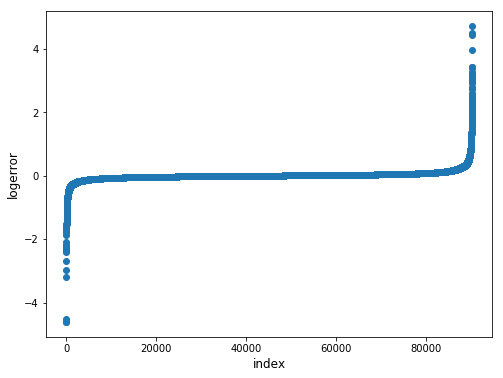

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

This looks nice with some outliers at both the ends!

Let us remove the outliers and then do a histogram plot on the same:

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


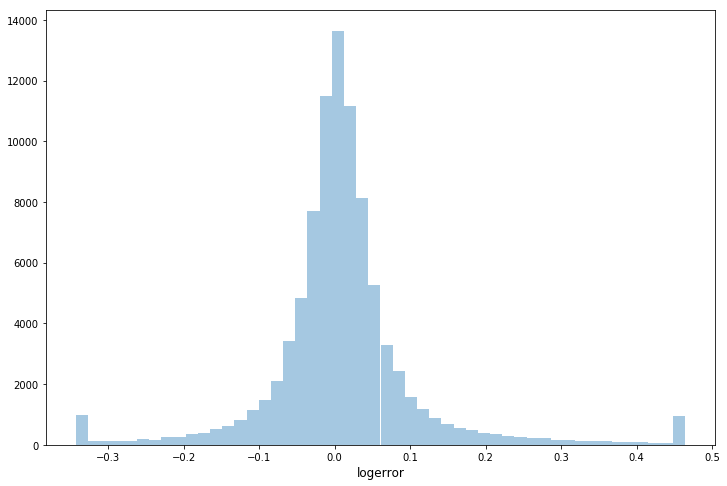

In [9]:
ulimit = np.percentile(train_df.logerror.values, 99)
llimit = np.percentile(train_df.logerror.values, 1)
train_df['logerror'].loc[train_df['logerror']>ulimit] = ulimit
train_df['logerror'].loc[train_df['logerror']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

Wow, nice normal distribution on the log error.

#### Transaction Date
Now let us explore the date field. Let us first check the number of transactions in each month:

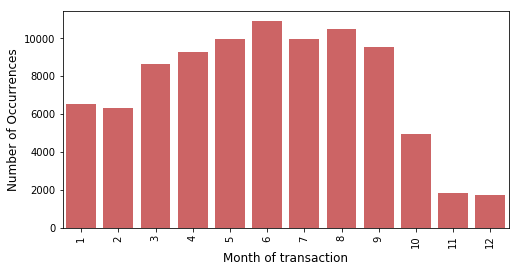

In [14]:
train_df['transaction_month'] = train_df['transactiondate'].dt.month
cnt_srs = train_df['transaction_month'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

As we could see from the data page as well: The train data has all the transactions before October 15, 2016, plus some of the transactions after October 15, 2016.

So we have shorter bars in the last three months.

#### Parcel Id

In [15]:
(train_df['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

So most of the parcel ids are appearing only once in the dataset.

#### Properties 2016
Now let us explore the properties_2016 file: